In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [120]:
pd.set_option('display.max_columns' , df.shape[1])
warnings.filterwarnings(action='ignore')

In [100]:
# read dataset using pandas
df = pd.read_csv("Data/Spotify_Tracks_Dataset.csv")
# remove 2 first columns because they are useless: copy on index and music id in spotify
df = df.iloc[:,2:]

In [101]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [102]:
df.shape

(114000, 19)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

## Data cleaning and preproccesing 

In [104]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [105]:
df.dropna(inplace=True)

In [106]:
# convert song durations from miliseconds to seconds
df['duration_ms'] = df['duration_ms'] / 1000

In [107]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,228.031153,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,107.296058,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174.066000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,212.906000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261.506000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237.295000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


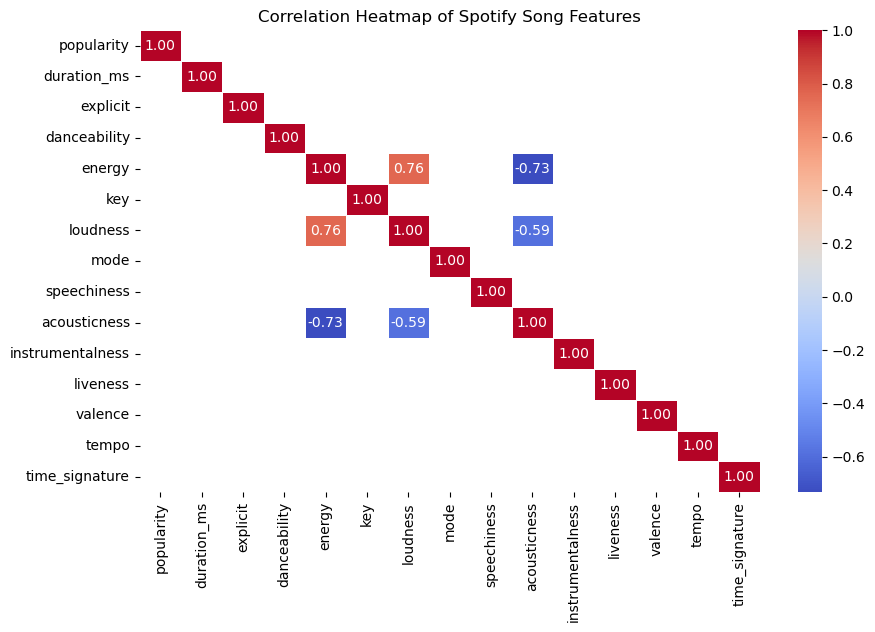

In [108]:
# select the numerical feature for calculating correlation
correlation_matrix = df.select_dtypes(exclude='object').corr()
# make filter to show only features with correlation above 0.5 or below -0.5
filt = ((correlation_matrix.loc[:] < 0.5) & (correlation_matrix.loc[:] > -0.5))
# plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5 , mask=filt)
plt.title("Correlation Heatmap of Spotify Song Features")
plt.show()

## Exploratory Data Analysis On DataSet

### Are most of the songs published on spotify popular?

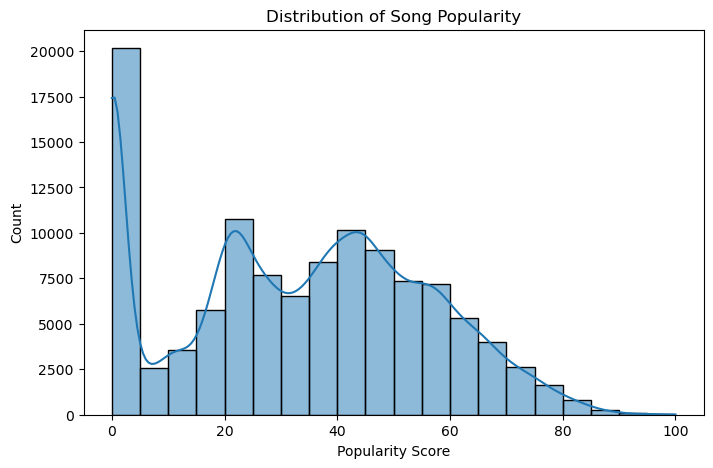

In [169]:
plt.figure(figsize=(8, 5))
sns.histplot(df["popularity"], bins=20, kde=True)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

In [ ]:
### Explanation  
By looking at the Histogram we can find out most of the songs have popularity near 0 and are failuires.
but beside that other songs are following a semi normal distribution, which was expected, al lot of songs have average popularity but a few of the mare hit songs

## Who are the most succesful artists?

In [173]:
# Split the 'artists' column by ';' and expand into a list
copy = df.copy()
copy['artists'] = copy['artists'].str.split(';')

# Explode the 'artists' column to have each artist in a separate row
df_exploded = copy.explode('artists', ignore_index=True)

df_exploded.shape

(158292, 20)

In [205]:
song_count = df_exploded['artists'].value_counts()

average_artist_popularity = df_exploded.groupby('artists')['popularity'].mean()

normalized_popularity = average_artist_popularity / song_count

result = pd.DataFrame({'avg_popularity': average_artist_popularity, 
                       'num_songs': song_count, 
                       'normalized_popularity': normalized_popularity})


bins = np.arange(2,300,25)

result['song_group'] = pd.cut(result['num_songs'], bins=bins)

top_artists_by_group = result.groupby('song_group').apply(lambda x: x.nlargest(3, 'normalized_popularity'))

top_artists_by_group


avg_popularity  num_songs  \
song_group artists                                            
(2, 27]    Harry Styles                92.000000          3   
           IVE                         84.000000          3   
           Morgan Wallen               83.333333          3   
(27, 52]   Travis Scott                72.483871         31   
           The White Stripes           66.689655         29   
           AC/DC                       69.593750         32   
(52, 77]   The Neighbourhood           75.583333         60   
           Zara Larsson                66.655172         58   
           Lil Peep                    66.534483         58   
(77, 102]  Calvin Harris               70.965116         86   
           Bring Me The Horizon        62.410256         78   
           Halsey                      71.466667         90   
(102, 127] Anirudh Ravichander         63.394231        104   
           The Chainsmokers            63.678899        109   
           A.R. Rahman                 61.386792        106   
(127, 152] Bethel Music                51.792308        130   
           Tove Lo                     49.240602        133   
           Arctic Monkeys              55.664474        152   
(152, 177] Elvis Presley               55.028571        175   
           Hillsong Worship            44.502994        167   
           Red Hot Chili Peppers       41.132075        159   
(177, 202] BTS                         68.869565        184   
           Ozuna                       48.643243        185   
           Charlie Brown Jr.           42.345946        185   
(202, 227] OneRepublic                 33.029268        205   
           Tiësto                      25.886878        221   
           Burna Boy                   14.476636        214   
(227, 252] Yuvan Shankar Raja          52.557940        233   
           Prateek Kuhad               46.947826        230   
           David Guetta                20.292000        250   
(252, 277] Linkin Park                 55.541502        253   
           Jhayco                       5.832714        269   
           Ella Fitzgerald              3.365019        263   

                                  normalized_popularity  song_group  
song_group artists                                                   
(2, 27]    Harry Styles                       30.666667     (2, 27]  
           IVE                                28.000000     (2, 27]  
           Morgan Wallen                      27.777778     (2, 27]  
(27, 52]   Travis Scott                        2.338189    (27, 52]  
           The White Stripes                   2.299643    (27, 52]  
           AC/DC                               2.174805    (27, 52]  
(52, 77]   The Neighbourhood                   1.259722    (52, 77]  
           Zara Larsson                        1.149227    (52, 77]  
           Lil Peep                            1.147146    (52, 77]  
(77, 102]  Calvin Harris                       0.825176   (77, 102]  
           Bring Me The Horizon                0.800131   (77, 102]  
           Halsey                              0.794074   (77, 102]  
(102, 127] Anirudh Ravichander                 0.609560  (102, 127]  
           The Chainsmokers                    0.584210  (102, 127]  
           A.R. Rahman                         0.579121  (102, 127]  
(127, 152] Bethel Music                        0.398402  (127, 152]  
           Tove Lo                             0.370230  (127, 152]  
           Arctic Monkeys                      0.366214  (127, 152]  
(152, 177] Elvis Presley                       0.314449  (152, 177]  
           Hillsong Worship                    0.266485  (152, 177]  
           Red Hot Chili Peppers               0.258692  (152, 177]  
(177, 202] BTS                                 0.374291  (177, 202]  
           Ozuna                               0.262936  (177, 202]  
           Charlie Brown Jr.                   0.228897  (177, 202]  
(202, 22

### Explanation  
We grouped songs based on their artists. 

Our goal was to identify the best and most successful artists.

To achieve this:
- We separated the artists from featured songs and assigned each artist and song their own row in the dataset (`df_exploded`).
- We calculated the **average popularity** for each artist.
- We normalized the average popularity by dividing it by the number of songs each artist has.
- We grouped the artists by the number of songs and identified the top three artists in each category.

#### 🔍 Key Finding:  
The popularity and success of an artist should be evaluated by comparing them to artists with a similar level of work or number of songs. This ensures fair results. Without this, an artist with only one song could have a perfect popularity score of 100, appearing at the top of the list. By comparing artists to their similar competitors, we can justify the results more accurately.


## Can we produce a Hit song based on song properties?

In [110]:
# Define popularity categories based on quantiles
df["popularity_level"] = pd.qcut(df["popularity"], q=[0, 0.25, 0.75, 1.0], labels=["Low", "Medium", "High"])

# Check how many songs fall into each category
df["popularity_level"].value_counts()


popularity_level
Medium    57230
Low       28999
High      27770
Name: count, dtype: int64

In [121]:
from sklearn.preprocessing import MinMaxScaler

df_popularity_features = df.copy()
# Select numerical audio features
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize feature values
df_popularity_features[features] = scaler.fit_transform(df_popularity_features[features])

# Recalculate averages for each popularity level
popularity_features_scaled = df_popularity_features.groupby("popularity_level")[features].mean()





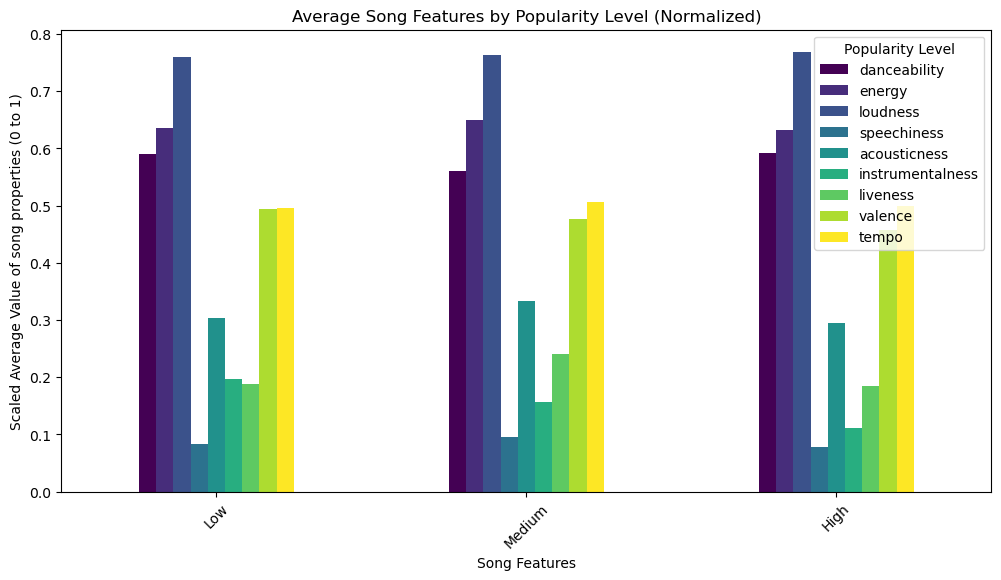

In [123]:
import matplotlib.pyplot as plt

popularity_features_scaled.plot(kind="bar", figsize=(12, 6), colormap="viridis")

# Formatting
plt.title("Average Song Features by Popularity Level (Normalized)")
plt.xlabel("Song popularity Group")
plt.ylabel("Scaled Average Value of song properties (0 to 1)")
plt.xticks(rotation=45)
plt.legend(title="Popularity Level")
plt.show()

### Explanation  
We categorized songs into three groups based on their popularity scores: **Low, Medium, and High**.  

Our goal was to analyze whether the **average values** of song features (such as **tempo, energy, etc.**) could help identify patterns that contribute to making a **hit song**.  

To achieve this:  
- We **normalized** the feature values.  
- Calculated their **average** within each popularity group.  
- Visualized the results in a chart.  

#### 🔍 Key Finding:  
The **feature patterns remain similar** across all popularity groups. This suggests that there isn’t a **straightforward formula** for producing a hit song using only these features.  

Other factors, such as **lyrics, marketing, and artist influence**, might play a crucial role in a song’s success.



## is there a relationship between song genre and its popularity?

In [130]:
# Count the number of songs per genre
top_genres = df["track_genre"].value_counts().head(10)  # Show top 10 genres
top_genres


track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
Name: count, dtype: int64

In [142]:
all_musics_genres_popularity = df.groupby("track_genre")['popularity'].mean().sort_values(ascending=False)
all_musics_genres_popularity

track_genre
pop-film          59.283000
k-pop             56.952953
chill             53.651000
sad               52.379000
grunge            49.594000
                    ...    
chicago-house     12.339000
detroit-techno    11.174000
latin              8.297000
romance            3.245000
iranian            2.210000
Name: popularity, Length: 114, dtype: float64

In [161]:
popular_song_df = df[df['popularity'] > 50]
filtered_musics_genres_popularity = popular_song_df.groupby("track_genre")['popularity'].mean().sort_values(ascending=False)
filtered_musics_genres_popularity

track_genre
rock           76.797414
dance          76.649306
latino         74.489712
reggaeton      73.165289
pop            72.203416
                 ...    
forro          53.538462
mpb            53.411765
gospel         53.342105
black-metal    52.909091
study          52.500000
Name: popularity, Length: 110, dtype: float64

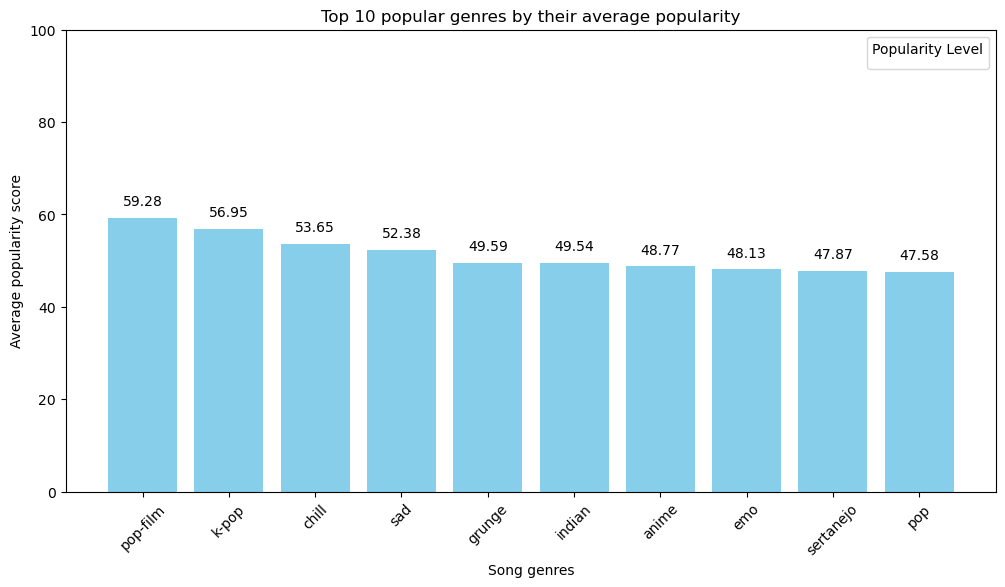

In [160]:
plt.figure(figsize=(12,6))
plt.bar(all_musics_genres_popularity.head(10).index, all_musics_genres_popularity.head(10).values, color='skyblue')
# Formatting

plt.title("Top 10 popular genres by their average popularity")
plt.xlabel("Song genres")
plt.ylabel("Average popularity score")
plt.ylim(0,100)
plt.xticks(rotation=45)
for i, v in enumerate( all_musics_genres_popularity.head(10).values):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

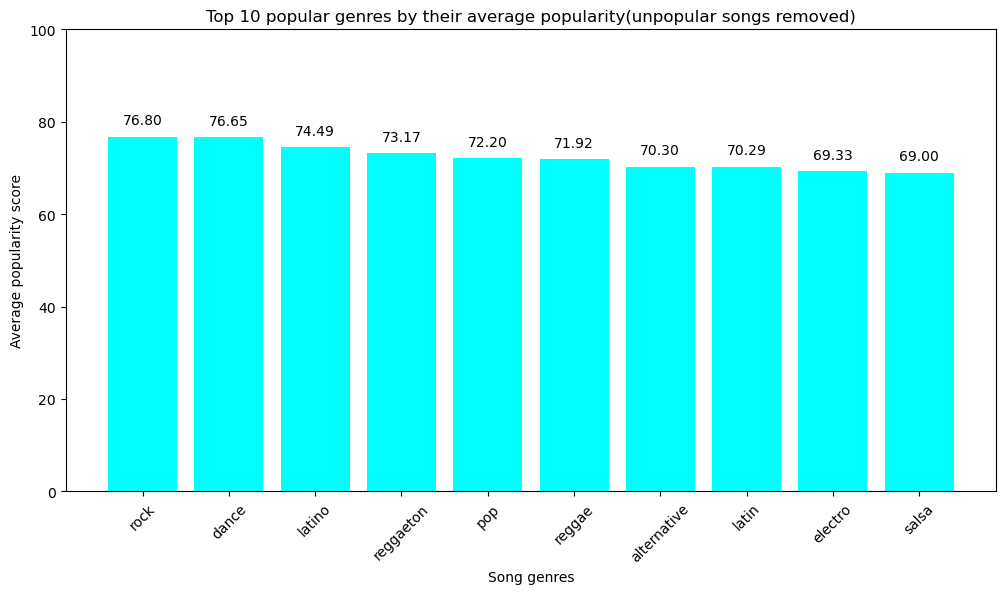

In [164]:
plt.figure(figsize=(12,6))
plt.bar(filtered_musics_genres_popularity.head(10).index, filtered_musics_genres_popularity.head(10).values, color='cyan')
# Formatting

plt.title("Top 10 popular genres by their average popularity(unpopular songs removed)")
plt.xlabel("Song genres")
plt.ylabel("Average popularity score")
plt.ylim(0,100)
plt.xticks(rotation=45)
for i, v in enumerate( filtered_musics_genres_popularity.head(10).values):
    plt.text(i, v + 2, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

### Explanation  
We grouped songs based on their genre to determine which genre has the highest average popularity.

Our goal was to analyze whether the average popularity of songs for each genre could help identify which genre has the most potential to produce a **hit song**. 

This analysis was done in two phases:
- Phase 1:
    We calculated the average popularity for all songs and identified the top successful genres.
- Phase 2:
    We calculated the average popularity for songs with a popularity score above 50 and identified the top successful genres.
#### 🔍 Key Finding:  
A **pop** or **K-pop** song is most likely to be popular, making them a safe bet for a hit. However, if the artist is talented enough, a **rock** song might offer an even better chance of success.

While other factors can influence success, focusing on the genre alone can significantly increase the odds of creating a hit song.